<a href="https://www.kaggle.com/code/dikshaaswal/customer-personality-analysis?scriptVersionId=168327272" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.cluster import KMeans
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep = '\t')

In [3]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data2 = data.dropna(subset=['Income'])

In [8]:
income_mean = data2.groupby('Education')['Income'].mean()

In [9]:
income_mean

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

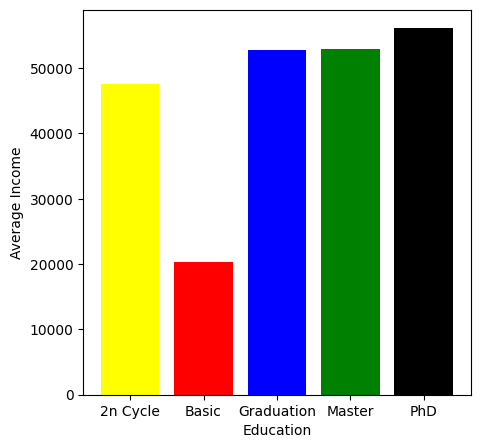

In [10]:
colors = ['yellow','red','blue','green','black','pink']
plt.figure(figsize = (5,5))
plt.bar(income_mean.index, income_mean.values, color = colors)
plt.xlabel("Education")
plt.ylabel("Average Income")
plt.show()

In [11]:
income_row = data.groupby('Education')['Income'].transform('mean')

In [12]:
data['Income'] = data['Income'].fillna(income_row)

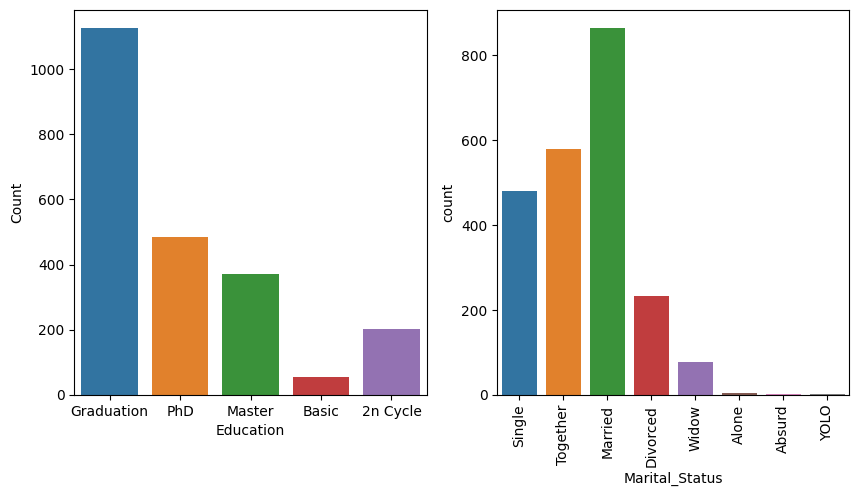

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,5 ))
sns.countplot(data= data, x = 'Education', ax = ax[0])
sns.countplot(data= data, x = 'Marital_Status',  ax = ax[1])
ax[0].set_xlabel("Education")
ax[0].set_ylabel("Count")
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
plt.show()

In [14]:
campaign_columns =[ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']

In [15]:
campaign_count = data[campaign_columns].apply(pd.Series.value_counts).T

In [16]:
campaign_count

,0,1
AcceptedCmp1,2096,144
AcceptedCmp2,2210,30
AcceptedCmp3,2077,163
AcceptedCmp4,2073,167
AcceptedCmp5,2077,163
Response,1906,334


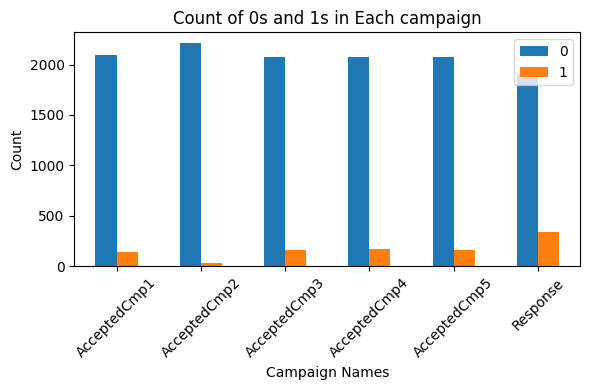

In [17]:
fig, ax = plt.subplots(figsize = (6,4))
campaign_count.plot(kind='bar', ax=ax)
ax.set_xticklabels(campaign_count.index, rotation=45)
ax.set_ylabel('Count')
ax.set_xlabel('Campaign Names')
plt.title('Count of 0s and 1s in Each campaign')
plt.legend(['0', '1'])
plt.tight_layout()
plt.show()

In [18]:
income_marital_status = data.groupby('Marital_Status')['Income'].mean()

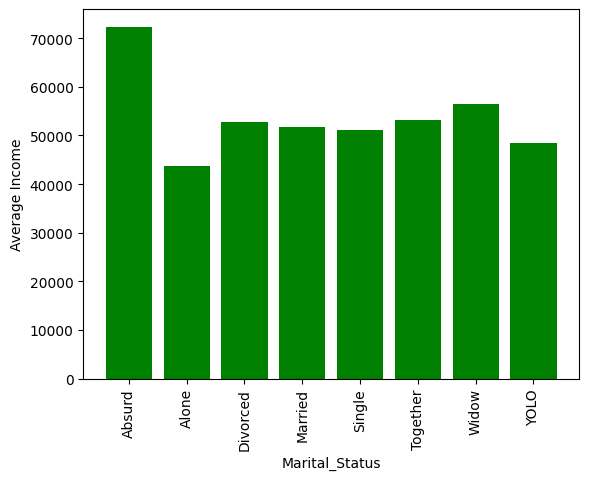

In [19]:
plt.bar(income_marital_status.index, income_marital_status.values, color = 'green')
plt.xlabel("Marital_Status")
plt.ylabel("Average Income")
plt.xticks(rotation = 90)
plt.show()

In [20]:
numerical_columns = ['Income', 'Kidhome', 'Teenhome',  'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

<Axes: >

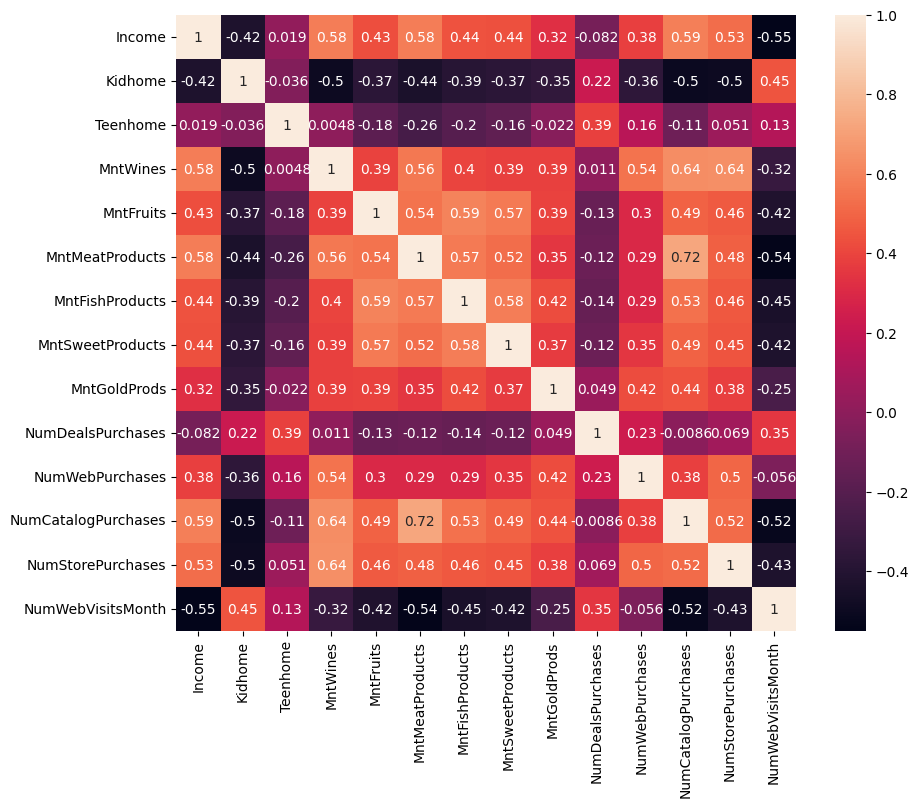

In [21]:
plt.figure(figsize = (10,8))
correlation = data[numerical_columns].corr()
sns.heatmap(correlation, annot = True)

In [22]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
data['Marital_Status'] = data['Marital_Status'].replace({'Single':0, 'Together':1, 'Married':1, 'Divorced':0, 'Widow':0, 'Alone':0,
       'Absurd':0, 'YOLO':0})

/tmp/ipykernel_18/2696721916.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital_Status'] = data['Marital_Status'].replace({'Single':0, 'Together':1, 'Married':1, 'Divorced':0, 'Widow':0, 'Alone':0,


In [24]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [25]:
data['Education'] = data['Education'].replace({'Graduation':3, 'PhD':4, 'Master':3, 'Basic':2, '2n Cycle':1})

/tmp/ipykernel_18/966492291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace({'Graduation':3, 'PhD':4, 'Master':3, 'Basic':2, '2n Cycle':1})


In [26]:
data.drop('ID', inplace=True, axis = 1)

In [27]:
data.insert(0, 'Age',(datetime.now().year - data['Year_Birth']).to_list())

In [28]:
data.drop('Year_Birth', inplace = True, axis=1)

In [29]:
data = data[(data['Income'] <= 300000) & (data['Age'] <=100) ]

Text(0, 0.5, 'Income')

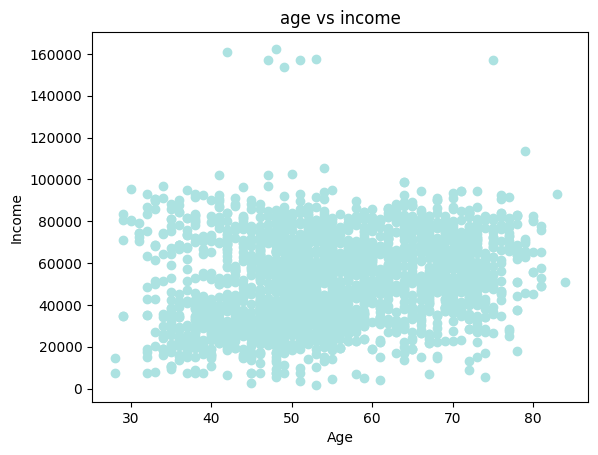

In [30]:

plt.scatter(data['Age'], data['Income'], color = "#ACE2E1")
plt.title("age vs income")
plt.xlabel("Age")
plt.ylabel("Income")

<Axes: xlabel='Age', ylabel='Income'>

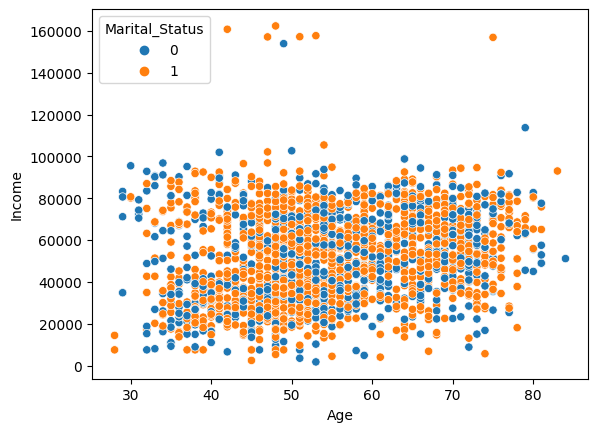

In [31]:
sns.scatterplot(data =data , x = 'Age', y ='Income', hue = 'Marital_Status')

In [32]:
to_datetime = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [33]:
Customer_Age = []
for date in data['Dt_Customer']:
    Customer_Age.append((to_datetime.max() - pd.to_datetime(date, format='%d-%m-%Y')).days)
    

In [34]:
data.insert(5, 'Customer_Age',Customer_Age)

In [35]:
data.drop('Dt_Customer', inplace = True, axis = 1)

In [36]:
data.Income.max()

162397.0

In [37]:
columnList = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_Revenue', 'Z_CostContact', 'Complain']
data = data.drop(columns=columnList)

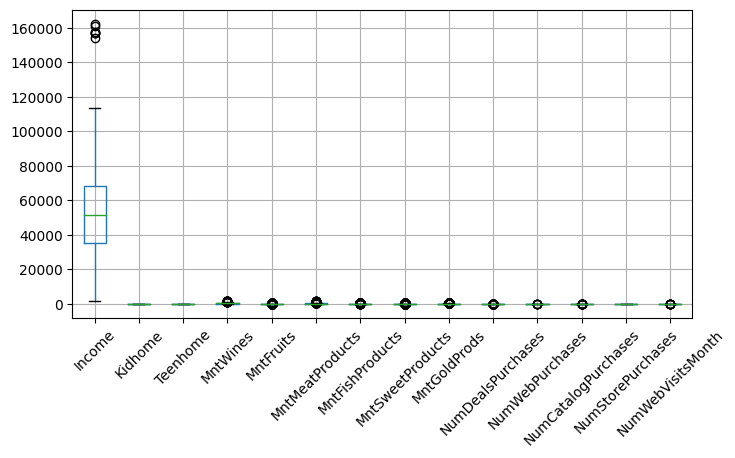

In [38]:
plt.figure(figsize = (8, 4))
data[numerical_columns].boxplot()
plt.xticks(rotation = 45)
plt.show()

In [39]:
std = StandardScaler()
data2 = std.fit_transform(data)

In [40]:
data2 = pd.DataFrame(data2, columns = list(data.columns))

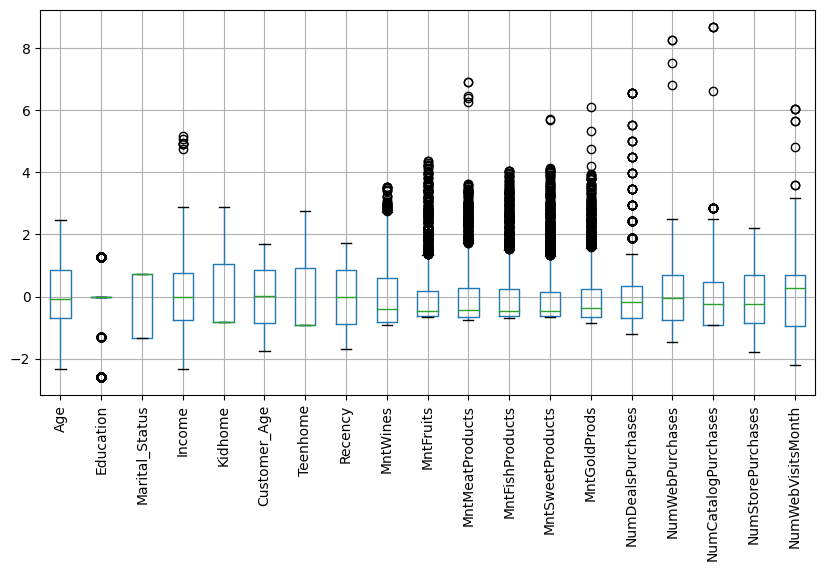

In [41]:
plt.figure(figsize = (10, 5))
data2.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [42]:
sum_square_distance = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    sum_square_distance.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


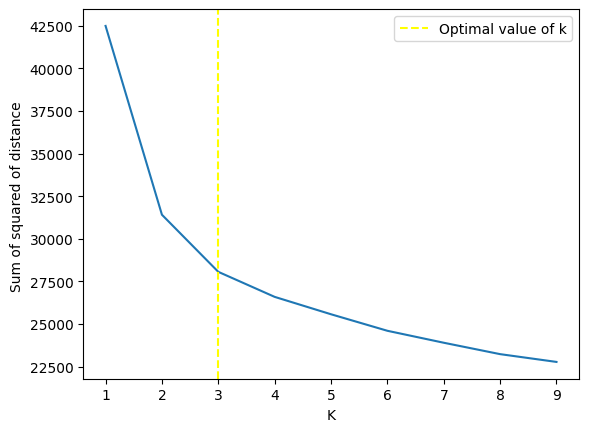

In [43]:
sns.lineplot(x = range(1, 10), y = sum_square_distance)
plt.axvline(x = 3, color = 'yellow', linestyle = '--', label = 'Optimal value of k')
plt.legend()
plt.xlabel('K')
plt.ylabel("Sum of squared of distance ")
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(data2)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


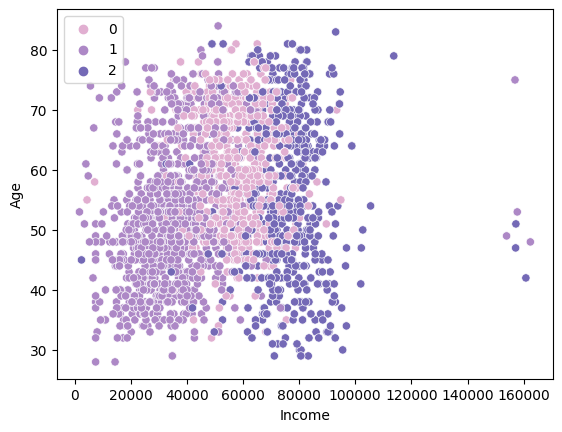

In [45]:
colors = ['#E1AFD1','#AD88C6','#7469B6']
sns.scatterplot(data =data , x = 'Income', y ='Age', hue = clusters, palette = colors)

plt.show()

In [46]:
data2.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Customer_Age', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

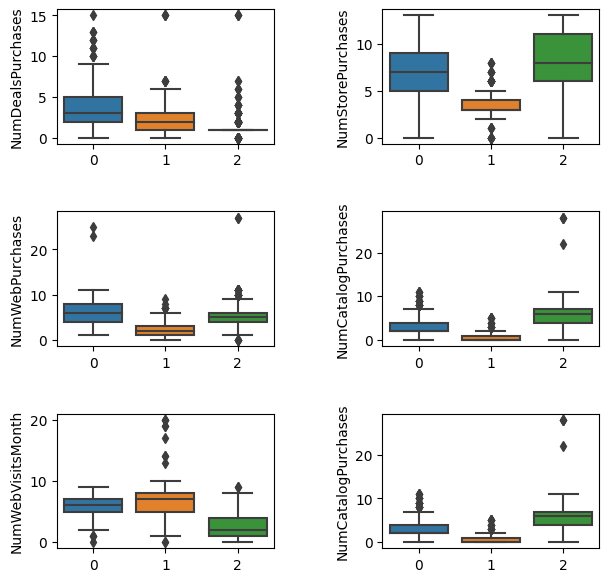

In [47]:
fig, ax = plt.subplots(3,2, figsize = (7,7))
sns.boxplot(x = clusters, y= data['NumDealsPurchases'], ax = ax[0][0])
sns.boxplot(x = clusters, y= data['NumStorePurchases'], ax = ax[0][1])
sns.boxplot(x = clusters, y= data['NumWebPurchases'], ax = ax[1][0])
sns.boxplot(x = clusters, y= data['NumCatalogPurchases'], ax = ax[1][1])
sns.boxplot(x = clusters, y= data['NumWebVisitsMonth'], ax = ax[2][0])
sns.boxplot(x = clusters, y= data['NumCatalogPurchases'], ax = ax[2][1])
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

# Now, will do it with feature reduction

In [48]:
data['Children'] = data["Kidhome"]+data["Teenhome"]
data.drop(['Kidhome', 'Teenhome'], inplace = True, axis = 1)

In [49]:
data['expenditure'] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [50]:
data.drop(['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace = True, axis = 1)

In [51]:
data.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Customer_Age',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Children', 'expenditure'],
      dtype='object')

In [52]:
std = StandardScaler()
scaler = std.fit_transform(data)

In [53]:
scaler = pd.DataFrame(scaler, columns = list(data.columns))

<Axes: >

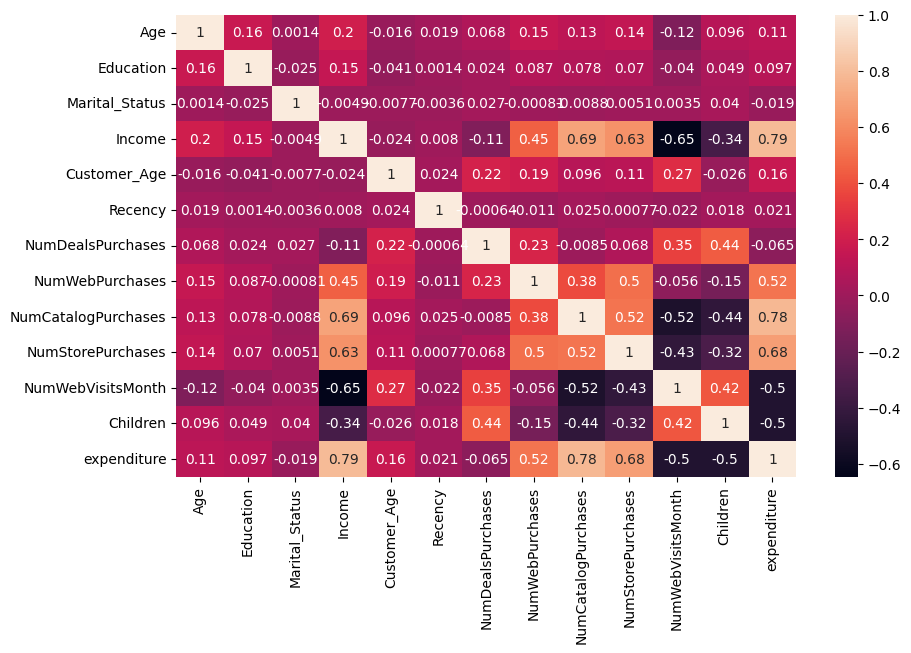

In [54]:
plt.figure(figsize = (10,6))
correlation =scaler.corr()
sns.heatmap(correlation, annot = True)

In [55]:
pca = PCA(n_components = 3)
pca_data = pca.fit_transform(scaler)

In [56]:
pca_data.shape

(2236, 3)

In [57]:
pca_data = pd.DataFrame(pca_data, columns = ['PCA1','PCA2','PCA3'])


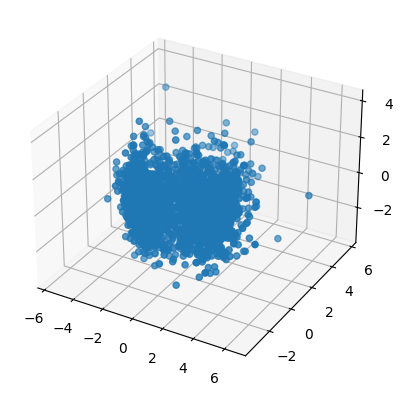

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data['PCA1'],pca_data['PCA2'],pca_data['PCA3'])
plt.show()

In [59]:
sum_square_distance = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_data)
    sum_square_distance.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


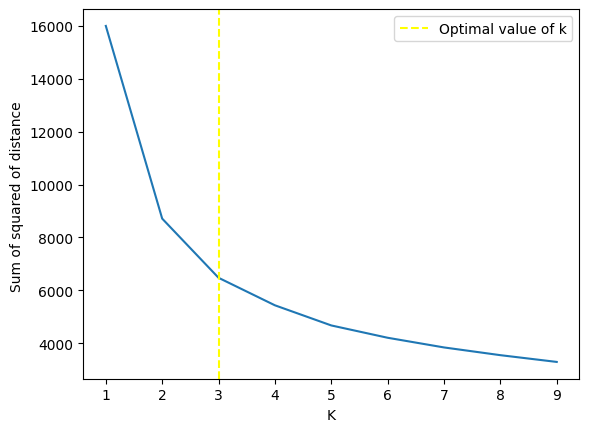

In [60]:
sns.lineplot(x = range(1, 10), y = sum_square_distance)
plt.axvline(x = 3, color = 'yellow', linestyle = '--', label = 'Optimal value of k')
plt.legend()
plt.xlabel('K')
plt.ylabel("Sum of squared of distance ")
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(pca_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
clusters

array([1, 0, 1, ..., 1, 1, 2], dtype=int32)

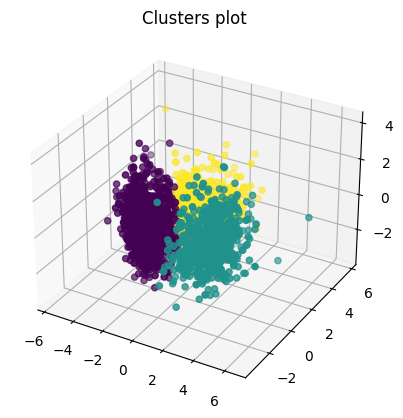

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data['PCA1'],pca_data['PCA2'],pca_data['PCA3'], c = clusters)
plt.title("Clusters plot")
plt.show()

<Axes: xlabel='Income', ylabel='Age'>

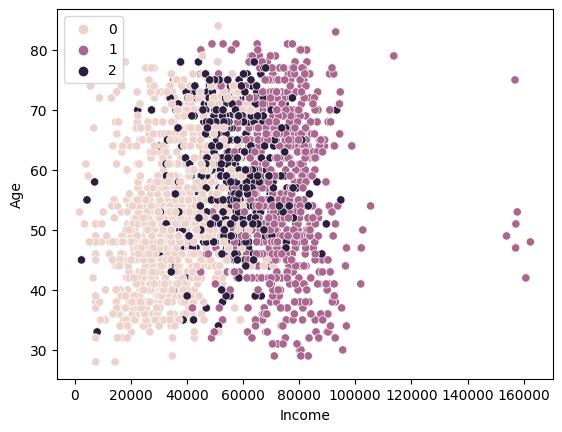

In [64]:
sns.scatterplot(x = 'Income', y = 'Age', hue = clusters, data = data)

<Axes: xlabel='Income', ylabel='expenditure'>

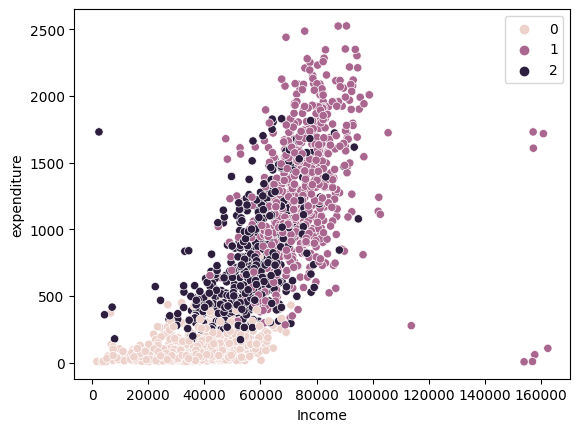

In [65]:
sns.scatterplot(x = 'Income', y = 'expenditure', hue = clusters, data = data)

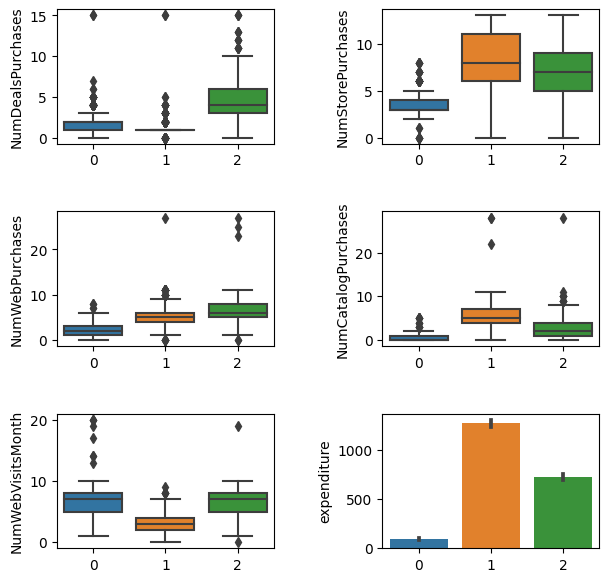

In [66]:
fig, ax = plt.subplots(3,2, figsize = (7,7))
sns.boxplot(x = clusters, y= data['NumDealsPurchases'], ax = ax[0][0])
sns.boxplot(x = clusters, y= data['NumStorePurchases'], ax = ax[0][1])
sns.boxplot(x = clusters, y= data['NumWebPurchases'], ax = ax[1][0])
sns.boxplot(x = clusters, y= data['NumCatalogPurchases'], ax = ax[1][1])
sns.boxplot(x = clusters, y= data['NumWebVisitsMonth'], ax = ax[2][0])
sns.barplot(x = clusters, y= data['expenditure'], ax = ax[2][1])
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)